# Housing in Buenos Aires


In this project, we are working for a client who wants to create a model that can predict the price of apartments in the city of Buenos Aires — with a focus on apartments that cost less than $400,000 USD. We have a collection of dataset contains the real estate data of **Buenos Aires**

## Importing modules

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

## Creating a wrangle function to read the all datasets and clean it

In [2]:
def wrangle(filepath):
    # Read csv file to df
    df = pd.read_csv(filepath)
    
    return df

In [3]:
df = wrangle("../input/buenos-aires-realestate-dataset/data1.csv")
print("df shape:", df.shape)
df.head()

df shape: (8606, 17)


,Unnamed: 0,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,0,sell,apartment,|Argentina|Capital Federal|Villa Crespo|,"-34.6047834183,-58.4586812499",180000.0,USD,2729232.0,180000.0,120.0,110.0,1500.000000,1636.363636,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
1,1,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,NaN,250000.0,USD,3790600.0,250000.0,117.0,120.0,2136.752137,2083.333333,NaN,4.0,NaN,http://ramos-mejia.properati.com.ar/s7pd_venta...
2,2,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,"-34.6497002,-58.658073",410000.0,USD,6216584.0,410000.0,410.0,220.0,1000.000000,1863.636364,NaN,NaN,NaN,http://castelar-moron.properati.com.ar/11vgn_v...
3,3,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,"-34.5957086,-58.5669503",180000.0,USD,2729232.0,180000.0,200.0,135.0,900.000000,1333.333333,NaN,5.0,NaN,http://tres-de-febrero.properati.com.ar/7f7u_v...
4,4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...


For this project, we want to build a model for apartments in Buenos Aires proper ("Capital Federal") that cost less than $400,000. Looking at the first five rows of our DataFrame, we can already see that there properties that fall outside those parameters. So our first cleaning task is to remove those observations from our dataset. Since we're using a function to import and clean our data, we'll need to make changes there.

In [4]:
def wrangle(filepath):
    # Read csv file to df
    df = pd.read_csv(filepath)
    
    # subset to properties in "Capital Federal"
    mask_ba = df["place_with_parent_names"].str.contains("Capital Federal")
    # subset to "appartments"
    mask_apt = df["property_type"] == "apartment"
    # subset to price < 400,000 USD
    mask_price = df["price_aprox_usd"]<400_000
    # subset
    df = df[mask_ba & mask_apt & mask_price]
    
    return df

In [5]:
df = wrangle("../input/buenos-aires-realestate-dataset/data1.csv")
print("df shape:", df.shape)
df.head()

df shape: (1781, 17)


,Unnamed: 0,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,0,sell,apartment,|Argentina|Capital Federal|Villa Crespo|,"-34.6047834183,-58.4586812499",180000.0,USD,2729232.0,180000.0,120.0,110.0,1500.000000,1636.363636,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
4,4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
11,11,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6050060697,-58.4001162302",60000.0,USD,909744.0,60000.0,28.0,28.0,2142.857143,2142.857143,NaN,1.0,NaN,http://once.properati.com.ar/zz0q_venta_depart...
20,20,sell,apartment,|Argentina|Capital Federal|San Nicolás|,"-34.603898,-58.378617",69000.0,USD,1046205.6,69000.0,NaN,22.0,NaN,3136.363636,23.0,2.0,NaN,http://san-nicolas.properati.com.ar/rnju_venta...


## Explore the dataset

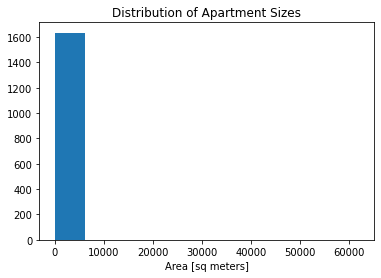

In [6]:
plt.hist(df["surface_covered_in_m2"])
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Apartment Sizes");

Its looks like the dataset contains some outliers, so let's take the summery statistics for the "surface_covered_in_m2" feature

In [7]:
df.describe()["surface_covered_in_m2"]

count     1635.000000
mean        97.877064
std       1533.057610
min          0.000000
25%         38.000000
50%         50.000000
75%         73.000000
max      62034.000000
Name: surface_covered_in_m2, dtype: float64

The statistics above confirm what we suspected. While most of the apartments in our dataset are smaller that 73 square meters, there are some that are several thousand square meters. The best thing to do is to change our wrangle function and remove them from the dataset.

So change the wrangle function so that it removes the outliers in the "surface_covered_in_m2" column

In [8]:
def wrangle(filepath):
    # Read csv file to df
    df = pd.read_csv(filepath)
    
    # subset to properties in "Capital Federal"
    mask_ba = df["place_with_parent_names"].str.contains("Capital Federal")
    # subset to "appartments"
    mask_apt = df["property_type"] == "apartment"
    # subset to price < 400,000 USD
    mask_price = df["price_aprox_usd"]<400_000
    # subset
    df = df[mask_ba & mask_apt & mask_price]
     
    # Removing outliers by "surface_covered_in_m2"
    low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
    mask_area = df["surface_covered_in_m2"].between(low, high)
    df = df[mask_area]
    
    return df

In [9]:
df = wrangle("../input/buenos-aires-realestate-dataset/data1.csv")
df.describe()["surface_covered_in_m2"]

count    1343.000000
mean       55.076694
std        18.160427
min        31.000000
25%        40.000000
50%        50.000000
75%        68.500000
max       100.000000
Name: surface_covered_in_m2, dtype: float64

So we removed the outliers.

**Next we create a scatter plot by Price vs Area**

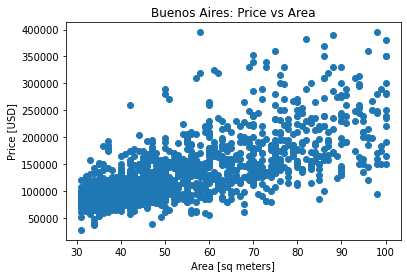

In [10]:
plt.scatter(x=df["surface_covered_in_m2"], y=df["price_aprox_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs Area");

This shows that there is a positive correlation between apartment price and size. So predicting the price of aparments, size will be good featue.

## Split

Splitting the dataset into **target** and **features** dataset

In [11]:
features = ["surface_covered_in_m2"]
X = df[features]
target = "price_aprox_usd"
y = df[target]

Spltting the into training set and validation set

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 0)

# Build the medel

### Baseline model

In [13]:
y_mean = y_train.mean()
y_mean

135631.64528301888

This is our baseline model prediction

In [14]:
y_pred_baseline = [y_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean apt price:", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price: 135631.65
Baseline MAE: 45591.41


Above shows the mean apartment price as the baseline prediction and the MAE of of the baseline model, so we have to ensure that our model should perform well than baseline model.

### Building the linear model

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_val)

In [17]:
mean_absolute_error(y_val, y_pred)

30597.638698440216

So its less than the MAE of baseline model, so it performs well.

In [18]:
X_test = pd.read_csv("../input/buenos-aires-realestate-dataset/testdata.csv")[features]
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0    118482.665324
1    136499.381880
2     89205.500921
3     89205.500921
4    107222.217477
dtype: float64

#### This is the prediction of our model on the testing dataset

## Communicating the results

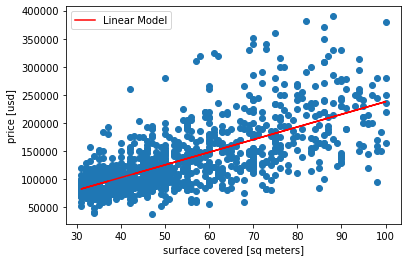

In [19]:
plt.plot(X_train, model.predict(X_train), color = "r", label = "Linear Model")
plt.scatter(X_train, y_train)
plt.xlabel("surface covered [sq meters]")
plt.ylabel("price [usd]")
plt.legend();

This is how our model genaralize the data patterns